In [1]:
import torch.nn as nn
import torch
from matplotlib import pyplot as plt

In [2]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv.weight

Parameter containing:
tensor([[[[ 4.0776e-02,  3.3614e-02, -1.2033e-01],
          [ 1.3226e-01,  2.5046e-02, -4.4180e-02],
          [ 9.5156e-02, -1.9826e-02, -3.0807e-02]],

         [[-5.1734e-02,  1.8299e-01, -9.3038e-02],
          [ 1.7415e-01, -5.0983e-03,  1.6456e-01],
          [-1.1103e-01, -4.6376e-02, -1.4576e-01]],

         [[ 8.8002e-02, -8.8180e-02, -1.8366e-02],
          [ 1.6338e-01,  2.3020e-02, -1.7346e-01],
          [-1.4869e-01, -4.4462e-02, -5.9463e-02]]],


        [[[ 3.6295e-03,  2.2523e-02,  1.0515e-01],
          [-9.7945e-02,  1.3205e-01, -1.3725e-01],
          [ 1.3144e-01, -1.6084e-01,  8.4507e-02]],

         [[ 2.3237e-02,  1.5860e-03, -6.7503e-02],
          [-2.4812e-02,  1.7197e-01,  2.8194e-02],
          [ 2.5601e-02, -1.6671e-01,  6.0952e-02]],

         [[-2.4837e-02, -1.4410e-01,  1.0171e-01],
          [-9.1053e-02,  1.4184e-01, -1.4704e-01],
          [-1.3875e-01, -1.6395e-01, -1.2423e-02]]],


        [[[ 1.4171e-01,  1.6653e-01, -8.4429

In [3]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [4]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

In [5]:
data_path = '../data-unversioned/p1ch7'
normalize = transforms.Normalize((.4915, .4823, .4468), (.2470, .2435, .2616))
transform = transforms.Compose([
    transforms.ToTensor(),
    normalize
])


cifar10 = CIFAR10(data_path, train=True, download=False, transform=transform)
cifar10_val = CIFAR10(data_path, train=False, download=False, transform=transform)

In [6]:
label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[i]) for img, i in cifar10 if i in [0, 2]]
cifar2_v = [(img, label_map[i]) for img, i in cifar10_val if i in [0, 2]]

In [7]:
len(cifar2)

10000

In [8]:
del cifar10, cifar10_val

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


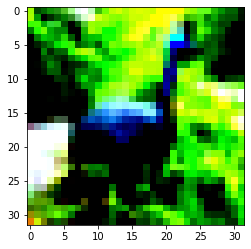

In [9]:
img, _ = cifar2[0]
_ = plt.imshow(img.permute(1, 2, 0))


In [10]:
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

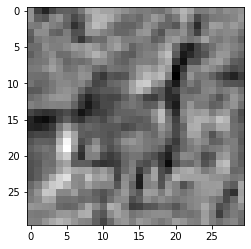

In [11]:
plt.imshow(output[0, 0].detach(), cmap='gray')

In [12]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [13]:
with torch.no_grad():
    conv.bias.zero_()
    conv.weight.fill_(1.0 / 9.0)

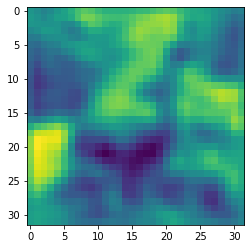

In [14]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach())

In [15]:
conv.weight

Parameter containing:
tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]],

         [[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]],

         [[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]], requires_grad=True)

In [16]:
conv = nn.Conv2d(3, 1, kernel_size=(2, 16), padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-10, 10, 10, -10, -10, 10, 10, -10]*2,
                                   [-10, 15, 15, -10, -10, 15, 15, -10]*2])
    conv.bias.zero_()

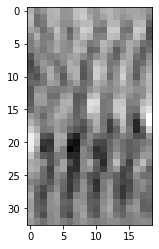

In [17]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0,0].detach(), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


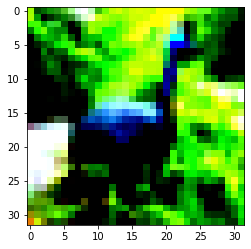

In [18]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')

In [19]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [20]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(8 * 8 * 8, 32),
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [21]:
sum([p.numel() for p in model.parameters()])

18090

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.act1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.act2(out)
        out = self.pool2(out)
        out = out.view(-1, 8 * 8 * 8)
        out = self.fc1(out)
        out = self.act3(out)
        return out

In [23]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 12, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(12, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = torch.tanh(self.conv1(x))
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = torch.tanh(self.fc2(out))
        out = self.fc3(out)
        return out

In [24]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
            
        if epoch == 1 or epoch % 5 == 0:
            print(f'{datetime.datetime.now()} epoch {epoch}: Training loss {loss_train / len(train_loader)}')

In [25]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [26]:
training_loop(
    n_epochs=50,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

2021-09-29 16:33:07.380488 epoch 1: Training loss 0.6742453168911539
2021-09-29 16:33:50.741589 epoch 5: Training loss 0.468070918397539
2021-09-29 16:34:44.434497 epoch 10: Training loss 0.3644988838654415
2021-09-29 16:35:38.263607 epoch 15: Training loss 0.3236729510270866
2021-09-29 16:36:32.834739 epoch 20: Training loss 0.3051389397899057
2021-09-29 16:37:31.052143 epoch 25: Training loss 0.28463618196309753
2021-09-29 16:38:29.280571 epoch 30: Training loss 0.2691346275958286
2021-09-29 16:39:24.044184 epoch 35: Training loss 0.2536302161444524
2021-09-29 16:40:18.718092 epoch 40: Training loss 0.2417482191779811
2021-09-29 16:41:14.271590 epoch 45: Training loss 0.23026597191383885
2021-09-29 16:42:09.244638 epoch 50: Training loss 0.2184315273526368


In [27]:
val_loader = torch.utils.data.DataLoader(cifar2_v, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        print(f"Accuracy {name}: {correct/total:.2f}")

In [28]:
validate(model, train_loader, val_loader)

Accuracy train: 0.88
Accuracy val: 0.86


In [29]:
def validate(model, train_data, val_data):
    for name, loader in [('train', train_data), ('val', val_data)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for batch, labels in loader:
                output = model(batch)
                total += labels.shape[0]
                _, predicted = torch.max(output, dim=1)
                correct += (predicted == labels).sum().item()
            print(f'{name} Accuracy: {correct/total:.2f}') 

In [30]:
validate(model, train_loader, val_loader)

train Accuracy: 0.88
val Accuracy: 0.86


In [31]:
torch.save(model.state_dict(), 'birds_vs_planes_cifar.pt')

In [32]:
load_model = Net()
load_model.load_state_dict(torch.load('birds_vs_planes_cifar.pt'))

<All keys matched successfully>

In [122]:
class NetDropOut(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        
        self.conv2 = nn.Conv2d(n_chans1, n_chans1//2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        
        self.fc1 = nn.Linear(n_chans1//2 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8  * (self.n_chans1//2))
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    

In [166]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        
        self.conv2 = nn.Conv2d(n_chans1, n_chans1//2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1//2)
        
        self.fc1 = nn.Linear(8 * 8 * n_chans1//2, 32)
        self.fc1 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out))
        out = self.conv2_batchnorm(self.conv2(x))
        out = F.max_pool2d(torch.tanh(out))
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out